
## Introduction

This projcet is for wrangling data from WeRateDogs Twitter account using Python and then save it to notebook titled (wrangle_act.ipynb)


The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.
The.

There are 3 Dataframes in this analysis as follows:

### Enhanced Twitter Archive

The WeRateDogs Twitter archive as (twitter_archive_enhanced.csv)


### Image Predictions File

The tweet image predictions as (image_predictions.tsv) hosted on udacity server and will imported programmatically

### Twitter API

using Tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive
Before we start, herea are few points to keep in mind when data wrangling for this project:



In [487]:
import pandas as pd 
import requests
import tweepy
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler

In [57]:
df = pd.read_csv('twitter-archive-enhanced.csv')


In [482]:
# Predictions of dog breeds
url_image_predictions = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/'
                         '599fd2ad_image-predictions/image-predictions.tsv')

# Create dataframe from TSV
df_image_predictions = pd.read_csv(url_image_predictions, delimiter='\t')


In [486]:
df_image_predictions.to_csv('url_image_predictions.csv',index= False, encoding='utf-8')


In [80]:

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key ='QdcyALZsYRKtyhGCS9afWpqG6'
consumer_secret ='QBvcFVxKcrM1QVdTFcCluFMQVzbL5oJaWkJDrU4HtYyk2NjXcI'
access_token ='1135640141161271303-Ume4PIr7TN5NE83nJbHp6Ixxt0YGHe'
access_secret = 'IELZc1BKWni37ZwaKvUTVQN4ZN9o01VfsOhz2boiOe7D3'  

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [82]:
# Use Twitter API to collect status data on tweets present in twitter1 dataframe
''''tweet_ids = list(df['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)
''

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832


Rate limit reached. Sleeping for: 66


779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096
754011816964026368


Rate limit reached. Sleeping for: 174


680055455951884288


In [83]:
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [232]:
df_json = pd.read_json('tweet_json.txt')
df_json['tweet_id'] = tweet_id_success
df_json = df_json[['tweet_id', 'favorite_count', 'retweet_count']]
df_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36276,7725
1,892177421306343426,31279,5710
2,891815181378084864,23546,3785
3,891689557279858688,39567,7878
4,891327558926688256,37787,8496
...,...,...,...
2326,666049248165822465,96,39
2327,666044226329800704,272,132
2328,666033412701032449,112,41
2329,666029285002620928,121,42


## Assessing Data

## 1 - First df (twitter-archive-enhanced)

In [488]:
df.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [93]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [61]:
sum(df.duplicated())

0

In [64]:
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [86]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [95]:
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality issues: For twitter-archive-enhanced
- Missing data columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, etweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- Keep original ratings (no retweets) that have image as requested
- drop columns that's not important for analysis 
- timestamp is object
- All of rating_denominator should be 10 
- tweet_id to str

### Tidiness issues:
- The for last columns need to be modified

In [102]:
df_image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [103]:
df_image_predictions.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [246]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality issues: For df_image_predictions
- create a coulmn for the dog type
- Delete columns that won't be used for analysis
- Drop 66 jpg_url duplicated
- Capitalize the first letter of names of p1,p2,p3 columns


In [187]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


### Quality issues: df_json
- Renaming the column names
- tweet_id to str

# Data cleaning 

In [495]:
twitter_archive_clean = df.copy()
image_prediction_clean = df_image_predictions.copy()
tweet_json_clean = df_json.copy()

## twitter_archive_clean

- Keep original ratings
- tweet_id to str

In [496]:
#Keep original ratings
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

2- Delete columns using drop method:


In [497]:
# Delete columns that won't be used for analysis 
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_timestamp',
                                                    'retweeted_status_user_id', 
                                                    'expanded_urls'], 1)
#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


3 - timestamp is object

In [498]:
#timestamp to timestamp
twitter_archive_clean['timestamp']= pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean

#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   doggo               2175 non-null   object             
 7   floofer             2175 non-null   object             
 8   pupper              2175 non-null   object             
 9   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 186.9+ KB


4- All of rating_denominator should be 10

In [499]:
# tranform All of rating_denominator should be 10
twitter_archive_clean['rating_denominator'].replace(50, 10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(80,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(11,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(20,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(2,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(16,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(40,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(70,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(15,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(90,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(110,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(120,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(130,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(150,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(170,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(7,10, inplace= True)
twitter_archive_clean['rating_denominator'].replace(0,10, inplace= True)

#test
twitter_archive_clean['rating_denominator'].value_counts()


10    2175
Name: rating_denominator, dtype: int64

In [500]:
#tweet_id to str
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   doggo               2175 non-null   object             
 7   floofer             2175 non-null   object             
 8   pupper              2175 non-null   object             
 9   puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 186.9+ KB


twitter_archive_clean 
Tidiness issues:
- The for last columns need to be modified

In [507]:
#Creating one combined columns for the last 4 coulmuns
def dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    
    if not stage:
        return "None"
    else:
        return ','.join(stage)
    
twitter_archive_clean['dog_stage'] = twitter_archive_clean.apply(lambda row: dog_stage(row), axis=1)
#test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                2175 non-null   object             
 6   doggo               2175 non-null   object             
 7   floofer             2175 non-null   object             
 8   pupper              2175 non-null   object             
 9   puppo               2175 non-null   object             
 10  dog_stage           2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 203.9+ KB


In [508]:
#drop coulmns
twitter_archive_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)


In [509]:
#test
twitter_archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None
...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9,10,a,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7,10,a,None


## image_prediction_clean

In [510]:
#create a coulmn for the dog type
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

# test
image_prediction_clean.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074


1- Delete columns & that won't be used for analysis

In [511]:
#- Delete columns that won't be used for analysis
 
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#test
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2075 non-null   int64 
 1   jpg_url          2075 non-null   object
 2   dog_type         2075 non-null   object
 3   confidence_list  2075 non-null   object
dtypes: int64(1), object(3)
memory usage: 65.0+ KB


In [512]:
# drop errors in dog type
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

#test 
image_prediction_clean['dog_type'].value_counts()


golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
pug                      65
                       ... 
EntleBucher               1
Scotch_terrier            1
standard_schnauzer        1
Bouvier_des_Flandres      1
silky_terrier             1
Name: dog_type, Length: 113, dtype: int64

2- Drop 66 jpg_url duplicated

In [513]:
#Drop 66 jpg_url duplicated

image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')
#test
image_prediction_clean['dog_type'].value_counts()


golden_retriever        158
Labrador_retriever      108
Pembroke                 95
Chihuahua                91
pug                      63
                       ... 
clumber                   1
Scotch_terrier            1
Bouvier_des_Flandres      1
Irish_wolfhound           1
Japanese_spaniel          1
Name: dog_type, Length: 113, dtype: int64

3- df_tweet to str

In [515]:

#tweet_id to object to merge

image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype('str')


In [516]:
#test
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1691 non-null   object
 1   jpg_url          1691 non-null   object
 2   dog_type         1691 non-null   object
 3   confidence_list  1691 non-null   object
dtypes: object(4)
memory usage: 66.1+ KB


# df_json

In [466]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


1- Renaming the column names

2- df_tweet to str

In [517]:
#tweet_id to object to merge
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('str')
#test
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


## Merging the dataframes

In [470]:
df_m1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])



df_m1 = df_m1[df_m1['jpg_url'].notnull()]
df_m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1 to 2174
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1626 non-null   object             
 1   timestamp           1626 non-null   datetime64[ns, UTC]
 2   text                1626 non-null   object             
 3   rating_numerator    1626 non-null   int64              
 4   rating_denominator  1626 non-null   int64              
 5   name                1626 non-null   object             
 6   dog_stage           1626 non-null   object             
 7   jpg_url             1626 non-null   object             
 8   dog_type            1626 non-null   object             
 9   confidence_list     1626 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 139.7+ KB


In [471]:
twitter_archive_master = pd.merge(df_m1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1626 non-null   object             
 1   timestamp           1626 non-null   datetime64[ns, UTC]
 2   text                1626 non-null   object             
 3   rating_numerator    1626 non-null   int64              
 4   rating_denominator  1626 non-null   int64              
 5   name                1626 non-null   object             
 6   dog_stage           1626 non-null   object             
 7   jpg_url             1626 non-null   object             
 8   dog_type            1626 non-null   object             
 9   confidence_list     1626 non-null   object             
 10  favorite_count      1620 non-null   float64            
 11  retweet_count       1620 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

In [472]:
twitter_archive_master['dog_type'].value_counts()


golden_retriever      143
Labrador_retriever    103
Pembroke               94
Chihuahua              87
pug                    60
                     ... 
standard_schnauzer      1
Irish_wolfhound         1
silky_terrier           1
clumber                 1
EntleBucher             1
Name: dog_type, Length: 113, dtype: int64

In [473]:
twitter_archive_master['rating_numerator'].value_counts()


12     404
10     353
11     342
13     211
9      133
8       68
7       32
14      21
6       16
5       14
4        7
3        5
2        2
165      1
1        1
24       1
144      1
26       1
27       1
44       1
45       1
50       1
60       1
75       1
80       1
84       1
88       1
99       1
121      1
143      1
0        1
Name: rating_numerator, dtype: int64

In [480]:
twitter_archive_master['dog_stage'].value_counts()


None             1375
pupper            165
doggo              51
puppo              20
floofer             7
doggo,pupper        6
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [475]:
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_type,confidence_list,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,31279.0,5710.0
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,23546.0,3785.0
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,39567.0,7878.0
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,37787.0,8496.0
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,19035.0,2846.0


In [477]:
twitter_archive_master['favorite_count'].max()

156501.0

# insight and visualization 

### 1- The most frequent rate is 12
### 2- The most frequent dog is golden_retriever   
### 3- The most frequent dog_stage is pupper 

Text(0.5, 0, 'Dog')

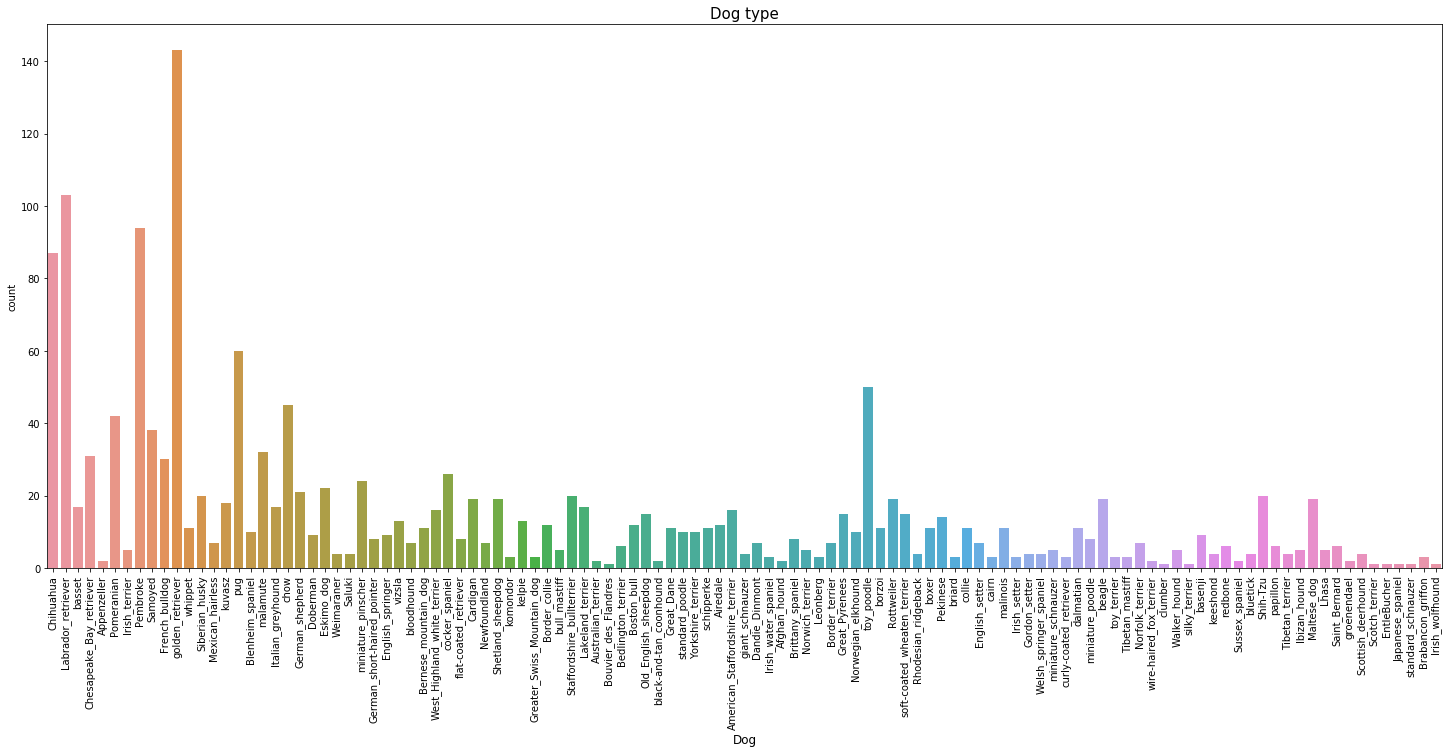

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
ax = sns.countplot(x="dog_type", data=twitter_archive_master,  orient ='H')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Dog type", fontsize=15)
ax.set_xlabel('Dog', fontsize=12)


Text(0.5, 0, 'Dog')

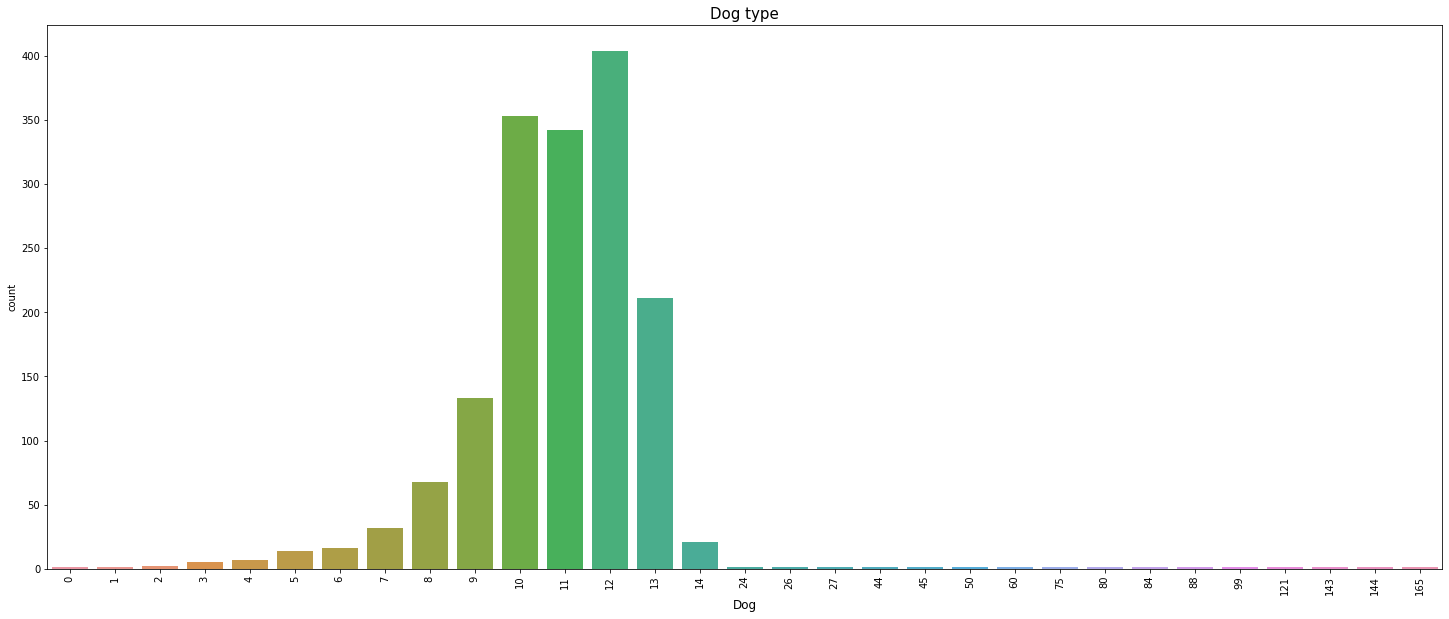

In [479]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
ax = sns.countplot(x="rating_numerator", data=twitter_archive_master,  orient ='H')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Dog rate", fontsize=15)
ax.set_xlabel('rate', fontsize=12)


In [519]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index= False, encoding='utf-8')
